In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression

In [4]:
df=pd.read_csv('/content/SeoulBikeData.csv', encoding='latin-1')

In [5]:
dataset_cols = df.columns.tolist()

In [6]:
dataset_cols


['Date',
 'Rented Bike Count',
 'Hour',
 'Temperature',
 'Humidity',
 'Wind speed ',
 'Visibility ',
 'Dew point temperature',
 'Solar Radiation ',
 'Rainfall',
 'Snowfall',
 'Seasons',
 'Holiday',
 'Functioning Day']

In [7]:
df.head()

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [8]:
df = df.drop(["Date","Holiday","Seasons"],axis=1)

In [9]:
df["Functioning Day"]=(df["Functioning Day"]=="Yes").astype(int)
df= df[df["Hour"]== 12]
df=df.drop(["Hour"], axis=1)

In [10]:
df.head()

,Rented Bike Count,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Functioning Day
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


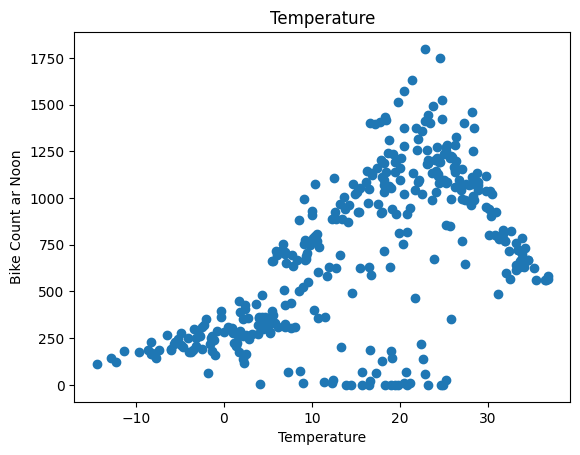

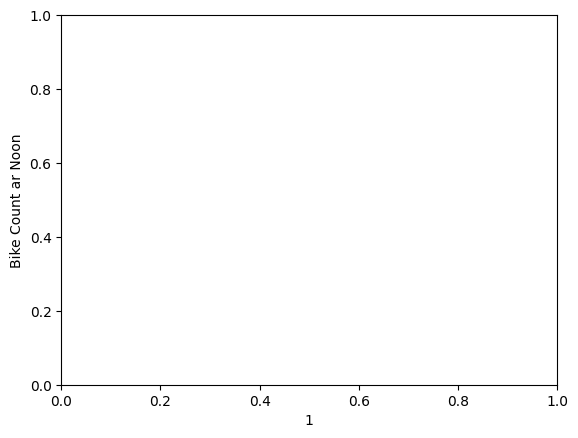

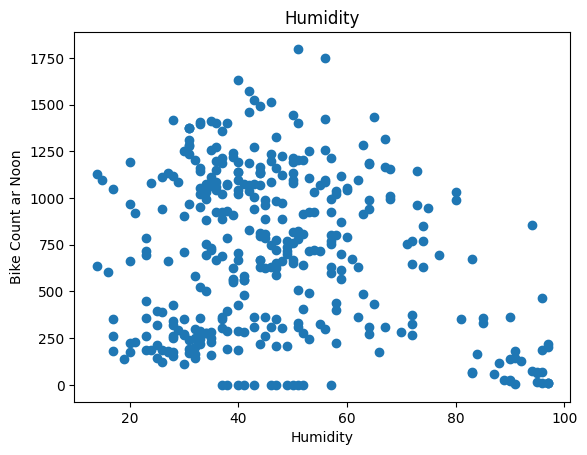

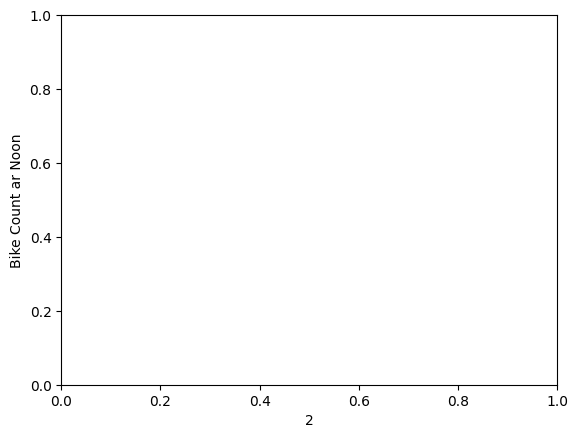

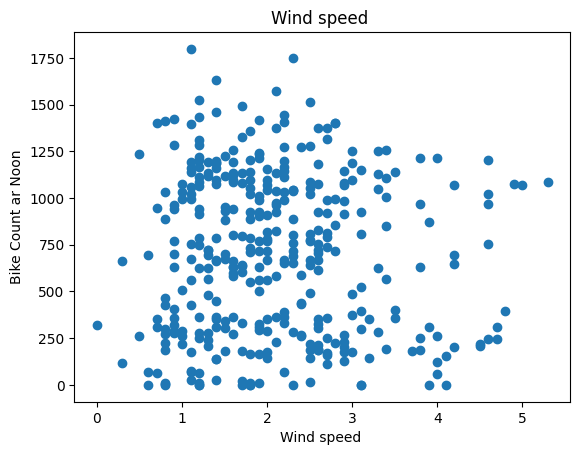

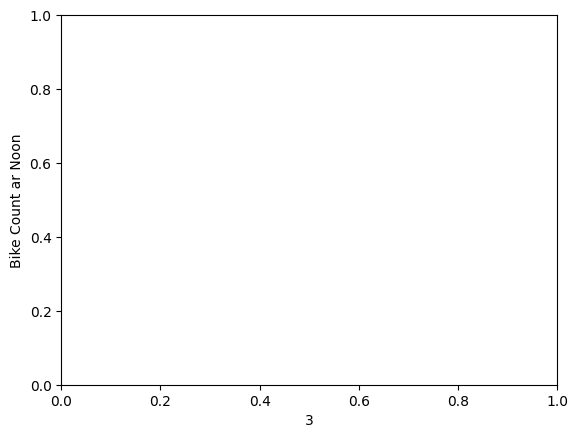

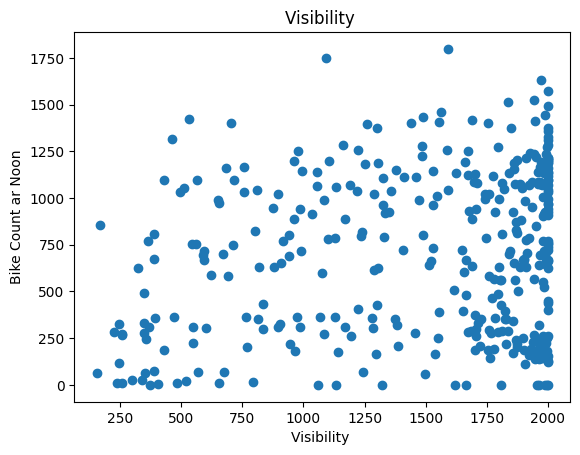

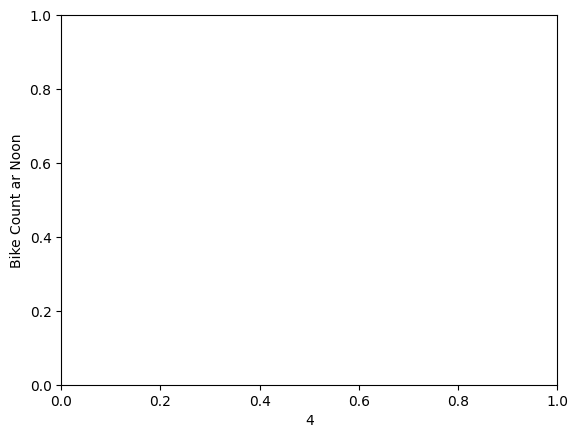

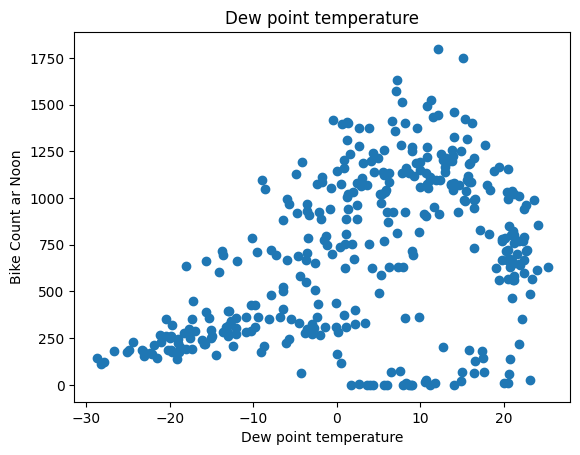

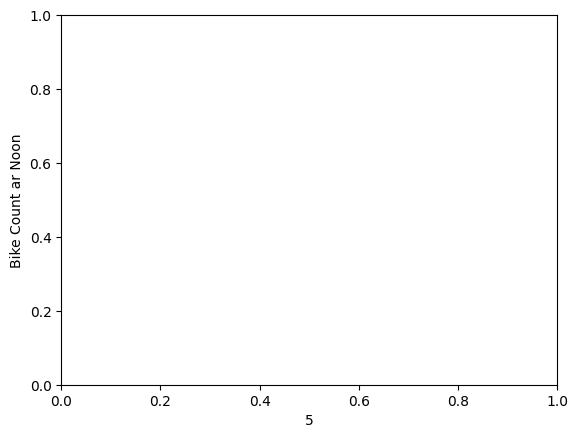

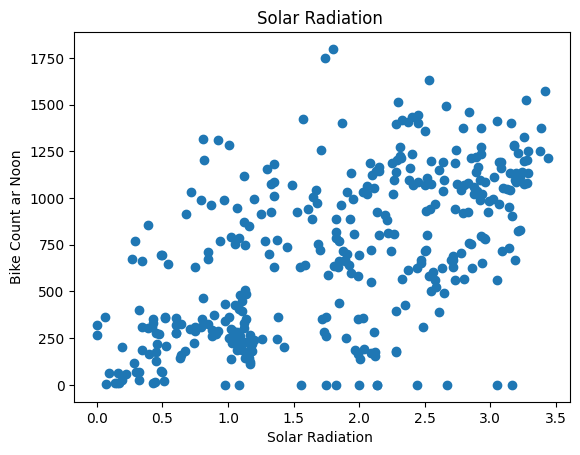

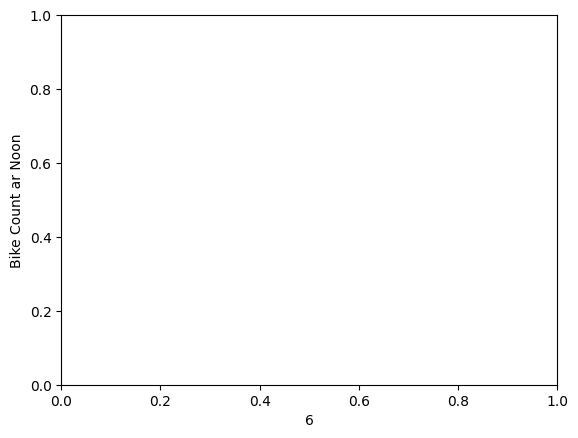

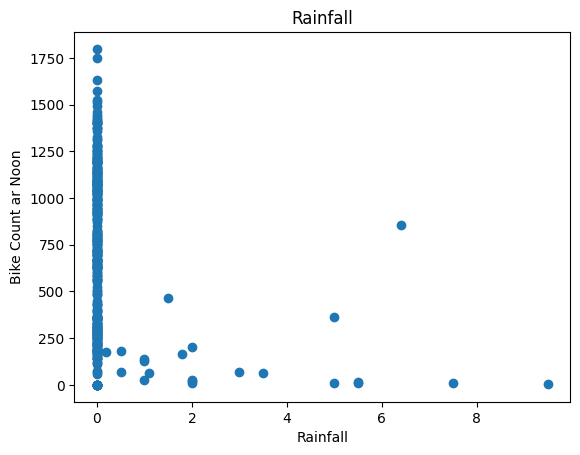

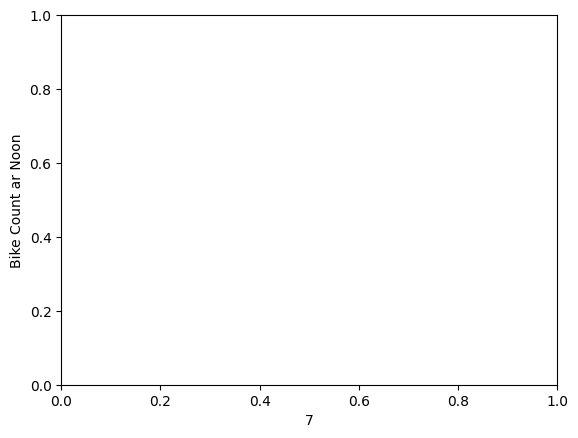

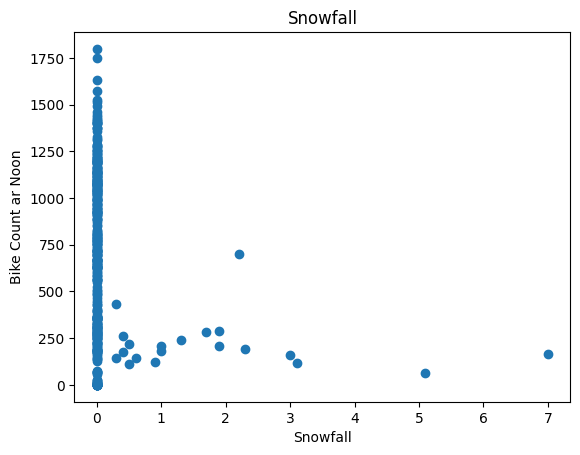

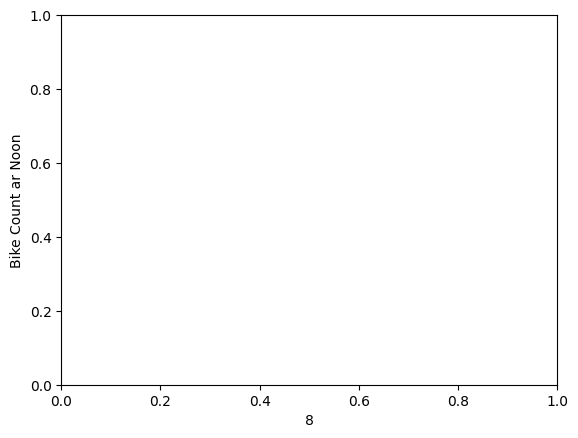

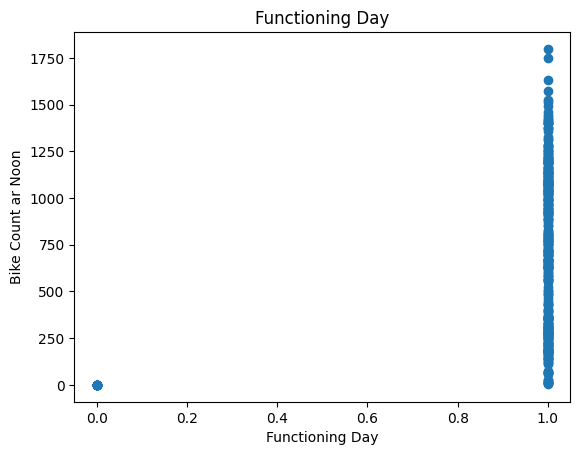

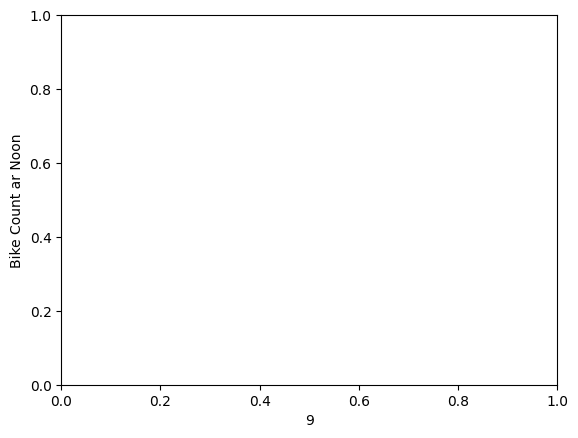

In [11]:
import matplotlib.pyplot as plt
for i in range(1,len(df.columns)):
  plt.scatter(df[df.columns[i]],df["Rented Bike Count"])
  plt.title(df.columns[i])
  plt.ylabel("Bike Count ar Noon")
  plt.xlabel(df.columns[i])
  plt.show()
  plt.ylabel("Bike Count ar Noon")
  plt.xlabel(i)
  plt.show()





In [12]:
print(df.columns)

Index(['Rented Bike Count', 'Temperature', 'Humidity', 'Wind speed ',
       'Visibility ', 'Dew point temperature', 'Solar Radiation ', 'Rainfall',
       'Snowfall', 'Functioning Day'],
      dtype='object')


In [13]:
df = df.drop(["Humidity","Wind speed ","Visibility ","Functioning Day"],axis=1)

In [14]:
df.head()

,Rented Bike Count,Temperature,Dew point temperature,Solar Radiation,Rainfall,Snowfall
12,449,1.7,-17.2,1.11,0.0,0.0
36,479,4.3,-7.8,1.09,0.0,0.0
60,333,5.8,3.4,0.43,0.0,0.0
84,393,-0.3,-12.9,1.11,0.0,0.0
108,321,-2.3,-19.7,0.00,0.0,0.0


In [15]:
train,val,test = np.split(df.sample(frac=1),[int(0.6*len(df)), int(0.8*len(df))])

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [16]:
import copy
def get_xy(dataframe, y_label,x_labels=None):
  dataframe = copy.deepcopy(dataframe)
  if x_labels is None:
    X=dataframe[[c for c in dataframe.columns if c!=y_label]].values
  else:
    if len(x_labels) == 1:
      X=dataframe[x_labels[0]].values.reshape(-1,1)
    else:
      X=dataframe[x_labels].values
  y=dataframe[y_label].values.reshape(-1,1)
  data = np.hstack((X,y))

  return data, X,y


In [17]:
_,X_train_temp,y_train_temp = get_xy(train, "Rented Bike Count", x_labels=["Temperature"])
_,X_val_temp,y_val_temp = get_xy(val, "Rented Bike Count", x_labels=["Temperature"])
_,X_test_temp,y_test_temp = get_xy(test, "Rented Bike Count", x_labels=["Temperature"])

In [18]:
temp_reg = LinearRegression()
temp_reg.fit(X_train_temp,y_train_temp)

LinearRegression()

In [19]:
temp_reg.score(X_test_temp,y_test_temp)

0.29185286640888874

It is not highly correlated

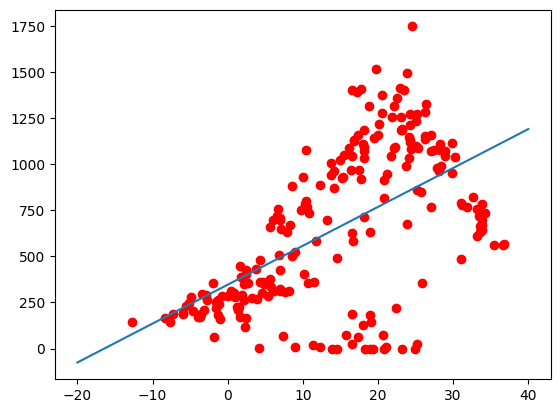

In [20]:
plt.scatter(X_train_temp,y_train_temp,color='red')
x=tf.linspace(-20,40,100)
plt.plot(x, temp_reg.predict(np.array(x).reshape(-1,1)))
plt.show()

Through the graph, it is not a good fit

In [21]:
df.columns


Index(['Rented Bike Count', 'Temperature', 'Dew point temperature',
       'Solar Radiation ', 'Rainfall', 'Snowfall'],
      dtype='object')

In [22]:
_,X_train_all,y_train_all = get_xy(train, "Rented Bike Count", x_labels= df.columns[1:])
_,X_val_all,y_val_all = get_xy(val, "Rented Bike Count", x_labels=df.columns[1:])
_,X_test_all,y_test_all = get_xy(test, "Rented Bike Count", x_labels=df.columns[1:])

In [23]:
all_reg = LinearRegression()
all_reg.fit(X_train_all,y_train_all)

LinearRegression()

In [24]:
all_reg.score(X_test_all,y_test_all)

0.4300983394445954

It improved

Regression with Neural Net

In [25]:
temp_normalizer = tf.keras.layers.Normalization(input_shape = (1,),axis = None)
temp_normalizer.adapt(X_train_temp.reshape(-1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [26]:
temp_nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(1)
])

In [47]:
temp_nn_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.1),loss = 'MSE')

In [48]:
history = temp_nn_model.fit(X_train_temp,y_train_temp,verbose = 0,epochs = 1000,validation_data = (X_val_temp,y_val_temp))

In [30]:
def plot_loss(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper right')
  plt.show()

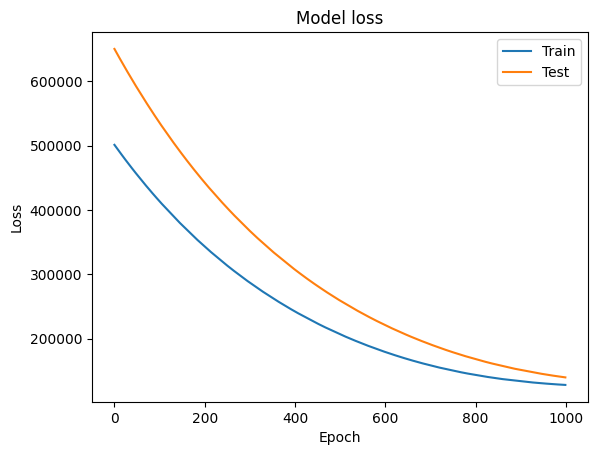

In [33]:
plot_loss(history)

Neural Net

In [50]:
temp_normalizer = tf.keras.layers.Normalization(input_shape = (1,),axis = None)
temp_normalizer.adapt(X_train_temp.reshape(-1))
nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(32,activation = 'relu'),
    tf.keras.layers.Dense(32,activation = 'relu'),
    tf.keras.layers.Dense(32,activation = 'relu'),
    tf.keras.layers.Dense(1)
])
nn_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),loss='MSE')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [51]:
history = nn_model.fit(X_train_temp,y_train_temp,verbose = 0, epochs = 100,validation_data = (X_val_temp,y_val_temp))

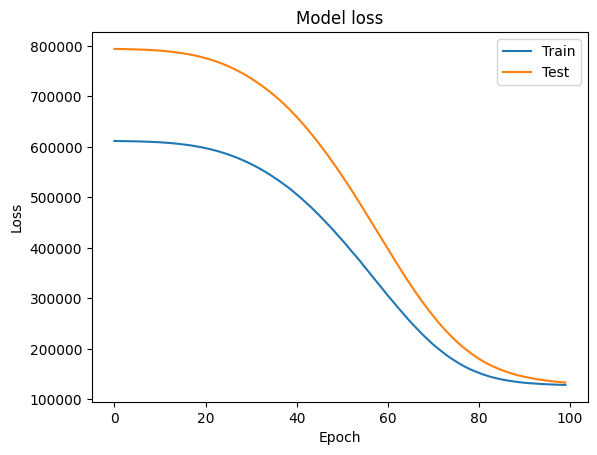

In [42]:
plot_loss(history)

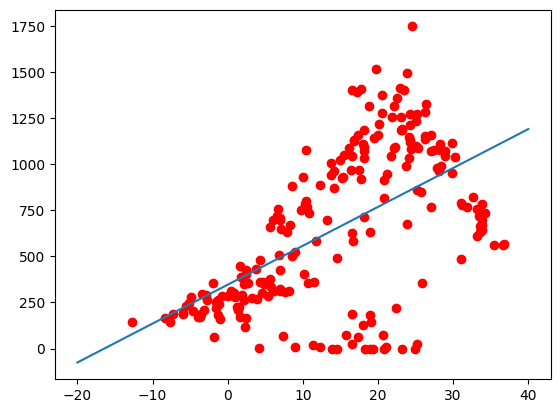

In [52]:
plt.scatter(X_train_temp,y_train_temp,color='red')
x=tf.linspace(-20,40,100)
plt.plot(x, temp_reg.predict(np.array(x).reshape(-1,1)))
plt.show()

In [74]:
all_normalizer = tf.keras.layers.Normalization(input_shape = (5,), axis = -1)
all_normalizer.adapt(X_train_all)

In [75]:

nn_model = tf.keras.Sequential([
    all_normalizer,
    tf.keras.layers.Dense(32,activation = 'relu'),
    tf.keras.layers.Dense(32,activation = 'relu'),
    tf.keras.layers.Dense(32,activation = 'relu'),
    tf.keras.layers.Dense(1)
])
nn_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),loss='MSE')

In [76]:
history = nn_model.fit(X_train_all,y_train_all,verbose = 0, epochs = 100,validation_data = (X_val_all,y_val_all))

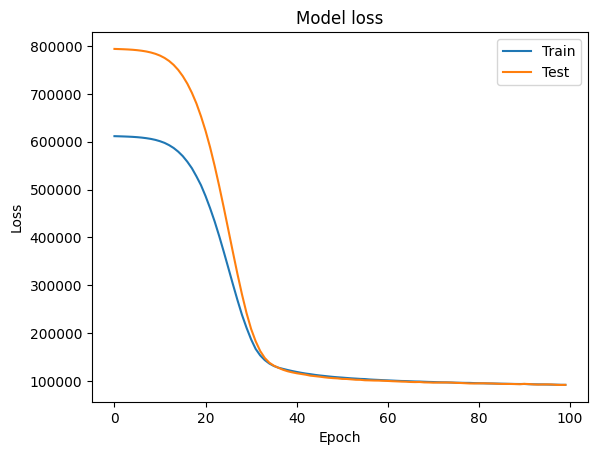

In [66]:
plot_loss(history)

Calculate MSE for both linear reg and nn

In [68]:
y_pred_lr = all_reg.predict(X_test_all)
y_pred_nn = nn_model.predict(X_test_all)
def MSE(y_pred, y_real):
  return (np.square(y_pred - y_real)).mean()

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


In [69]:
MSE(y_pred_lr,y_test_all)

103306.53365183878

In [70]:
MSE(y_pred_nn,y_test_all)

102272.6940647505

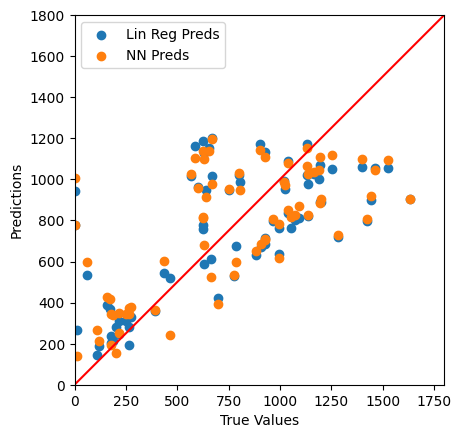

In [77]:
ax = plt.axes(aspect="equal")
plt.scatter(y_test_all, y_pred_lr, label="Lin Reg Preds")
plt.scatter(y_test_all, y_pred_nn, label="NN Preds")
plt.xlabel("True Values")
plt.ylabel("Predictions")
lims = [0, 1800]
plt.xlim(lims)
plt.ylim(lims)
plt.legend()
_ = plt.plot(lims, lims, c="red")